In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [238]:
def softmax(z):
    e_pa = np.exp(z)
    temp  = e_pa
    e_pa = e_pa/np.sum(temp,axis = 1,keepdims = True)
    return e_pa

class NeuralNetwork:
    def __init__(self,input_size ,layers,output_size):
        np.random.seed(0)
        model = {}
        
        model["W1"] = np.random.randn(input_size,layers[0])
        model["b1"] = np.zeros((1,layers[0]))
        
        model["W2"] = np.random.randn(layers[0],layers[1])
        model["b2"] = np.zeros((1,layers[1]))
        
        model["W3"] = np.random.randn(layers[1],output_size)
        model["b3"] = np.zeros((1,output_size))
        
        self.activations = None
        self.model = model
 
    def forward_prop(self,x):
        W1,W2,W3 = self.model["W1"],self.model["W2"],self.model["W3"]
        b1,b2,b3 = self.model["b1"],self.model["b2"],self.model["b3"]
        
        z1 = np.dot(x,W1)+b1
        a1 = np.tanh(z1)
        
        z2  = np.dot(a1,W2)+b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3)+b3
        y_ = softmax(z3)
        
        self.activations = (a1,a2,y_)
        
        return y_
    def backprop(self,x,y,learning_rate):
        W1,W2,W3 = self.model["W1"],self.model["W2"],self.model["W3"]
        b1,b2,b3 = self.model["b1"],self.model["b2"],self.model["b3"]
        
        a1,a2,y_ = self.activations
        m = x.shape[0]

        delta3 = y_-y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis = 0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis = 0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis = 0)
        
        #updating the variables 
        self.model["W1"] -= learning_rate*dw1
        self.model["b1"] -= learning_rate*db1
        
        self.model["W2"] -= learning_rate*dw2
        self.model["b2"] -= learning_rate*db2
        
        self.model["W3"] -= learning_rate*dw3
        self.model["b3"] -= learning_rate*db3
    
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis = 1)
    
    def summary(self):
        
        W1,W2,W3 = self.model["W1"],self.model["W2"],self.model["W3"]
        b1,b2,b3 = self.model["b1"],self.model["b2"],self.model["b3"]
       
        a1,a2,y_ = self.activations

        print("W1 :",W1.shape)
        print("A1 :",a1.shape)
        
        print("W2 :",W2.shape)
        print("A2 :",a2.shape)
        
        print("W3 :",W3.shape)
        print("Y_out :",y_.shape)
        
        
    

In [208]:
def loss(y_out,p):
    l = -np.mean(y_out*np.log(p))
    return l

In [209]:
def onehot(y,depth):
    m  = y.shape[0]
    y_hot = np.zeros((m,depth))
    y_hot[np.arange(m),y]= 1
    
    return y_hot

In [123]:
make_circles?

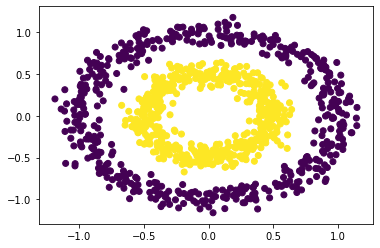

In [225]:
x,y = make_circles(n_samples = 1000,shuffle = True,noise =0.08,random_state = 9,factor =0.5 )
plt.scatter(x[:,0],x[:,1],c = y)

In [226]:
y = onehot(y,2)
print(y)

[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [227]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [228]:
print(x_train.shape)
print(x_test.shape)

(800, 2)
(200, 2)


In [230]:
model  = NeuralNetwork(2,[6,4],2)

In [231]:
def train(x,y,model,epochs,learning_rate,logs = True):
    train_loss = []
    for i in range(epochs):
        y_ = model.forward_prop(x)
        l = loss(y,y_)
        train_loss.append(l)
        model.backprop(x,y,learning_rate)
        if(logs):
            print("epochs : %d loss : %.4f"%(i,l))

    return train_loss      

In [236]:
loss1 = train(x_train,y_train,model,epochs =2000,learning_rate=0.001)

epochs : 0 loss : 0.0268
epochs : 1 loss : 0.0264
epochs : 2 loss : 0.0260
epochs : 3 loss : 0.0256
epochs : 4 loss : 0.0252
epochs : 5 loss : 0.0249
epochs : 6 loss : 0.0245
epochs : 7 loss : 0.0242
epochs : 8 loss : 0.0239
epochs : 9 loss : 0.0238
epochs : 10 loss : 0.0240
epochs : 11 loss : 0.0248
epochs : 12 loss : 0.0314
epochs : 13 loss : 0.0630
epochs : 14 loss : 0.3253
epochs : 15 loss : 0.5485
epochs : 16 loss : 0.2991
epochs : 17 loss : 0.4515
epochs : 18 loss : 0.3537
epochs : 19 loss : 0.2972
epochs : 20 loss : 0.2801
epochs : 21 loss : 0.2668
epochs : 22 loss : 0.2570
epochs : 23 loss : 0.2564
epochs : 24 loss : 0.2682
epochs : 25 loss : 0.3874
epochs : 26 loss : 0.2245
epochs : 27 loss : 0.2048
epochs : 28 loss : 0.2160
epochs : 29 loss : 0.2236
epochs : 30 loss : 0.3485
epochs : 31 loss : 0.2154
epochs : 32 loss : 0.1801
epochs : 33 loss : 0.1798
epochs : 34 loss : 0.1797
epochs : 35 loss : 0.2032
epochs : 36 loss : 0.2321
epochs : 37 loss : 0.3872
epochs : 38 loss : 0.3

epochs : 388 loss : 0.2352
epochs : 389 loss : 0.1011
epochs : 390 loss : 0.0692
epochs : 391 loss : 0.0644
epochs : 392 loss : 0.0601
epochs : 393 loss : 0.0564
epochs : 394 loss : 0.0535
epochs : 395 loss : 0.0511
epochs : 396 loss : 0.0491
epochs : 397 loss : 0.0472
epochs : 398 loss : 0.0455
epochs : 399 loss : 0.0440
epochs : 400 loss : 0.0426
epochs : 401 loss : 0.0413
epochs : 402 loss : 0.0400
epochs : 403 loss : 0.0389
epochs : 404 loss : 0.0378
epochs : 405 loss : 0.0368
epochs : 406 loss : 0.0359
epochs : 407 loss : 0.0350
epochs : 408 loss : 0.0341
epochs : 409 loss : 0.0333
epochs : 410 loss : 0.0325
epochs : 411 loss : 0.0318
epochs : 412 loss : 0.0311
epochs : 413 loss : 0.0304
epochs : 414 loss : 0.0298
epochs : 415 loss : 0.0292
epochs : 416 loss : 0.0286
epochs : 417 loss : 0.0281
epochs : 418 loss : 0.0276
epochs : 419 loss : 0.0271
epochs : 420 loss : 0.0266
epochs : 421 loss : 0.0262
epochs : 422 loss : 0.0258
epochs : 423 loss : 0.0254
epochs : 424 loss : 0.0253
e

epochs : 731 loss : 0.1782
epochs : 732 loss : 0.1776
epochs : 733 loss : 0.1770
epochs : 734 loss : 0.1763
epochs : 735 loss : 0.1757
epochs : 736 loss : 0.1750
epochs : 737 loss : 0.1743
epochs : 738 loss : 0.1736
epochs : 739 loss : 0.1729
epochs : 740 loss : 0.1721
epochs : 741 loss : 0.1713
epochs : 742 loss : 0.1705
epochs : 743 loss : 0.1696
epochs : 744 loss : 0.1686
epochs : 745 loss : 0.1676
epochs : 746 loss : 0.1665
epochs : 747 loss : 0.1653
epochs : 748 loss : 0.1639
epochs : 749 loss : 0.1624
epochs : 750 loss : 0.1607
epochs : 751 loss : 0.1588
epochs : 752 loss : 0.1565
epochs : 753 loss : 0.1537
epochs : 754 loss : 0.1503
epochs : 755 loss : 0.1461
epochs : 756 loss : 0.1405
epochs : 757 loss : 0.1331
epochs : 758 loss : 0.1229
epochs : 759 loss : 0.1093
epochs : 760 loss : 0.0936
epochs : 761 loss : 0.0793
epochs : 762 loss : 0.0682
epochs : 763 loss : 0.0598
epochs : 764 loss : 0.0535
epochs : 765 loss : 0.0487
epochs : 766 loss : 0.0450
epochs : 767 loss : 0.0420
e

epochs : 1039 loss : 0.0978
epochs : 1040 loss : 0.0969
epochs : 1041 loss : 0.0961
epochs : 1042 loss : 0.0952
epochs : 1043 loss : 0.0944
epochs : 1044 loss : 0.0935
epochs : 1045 loss : 0.0926
epochs : 1046 loss : 0.0916
epochs : 1047 loss : 0.0905
epochs : 1048 loss : 0.0894
epochs : 1049 loss : 0.0881
epochs : 1050 loss : 0.0867
epochs : 1051 loss : 0.0849
epochs : 1052 loss : 0.0828
epochs : 1053 loss : 0.0802
epochs : 1054 loss : 0.0769
epochs : 1055 loss : 0.0728
epochs : 1056 loss : 0.0679
epochs : 1057 loss : 0.0629
epochs : 1058 loss : 0.0585
epochs : 1059 loss : 0.0548
epochs : 1060 loss : 0.0518
epochs : 1061 loss : 0.0492
epochs : 1062 loss : 0.0470
epochs : 1063 loss : 0.0450
epochs : 1064 loss : 0.0432
epochs : 1065 loss : 0.0415
epochs : 1066 loss : 0.0400
epochs : 1067 loss : 0.0386
epochs : 1068 loss : 0.0373
epochs : 1069 loss : 0.0360
epochs : 1070 loss : 0.0349
epochs : 1071 loss : 0.0338
epochs : 1072 loss : 0.0328
epochs : 1073 loss : 0.0319
epochs : 1074 loss :

epochs : 1391 loss : 0.0135
epochs : 1392 loss : 0.0134
epochs : 1393 loss : 0.0132
epochs : 1394 loss : 0.0131
epochs : 1395 loss : 0.0129
epochs : 1396 loss : 0.0128
epochs : 1397 loss : 0.0126
epochs : 1398 loss : 0.0125
epochs : 1399 loss : 0.0124
epochs : 1400 loss : 0.0123
epochs : 1401 loss : 0.0121
epochs : 1402 loss : 0.0120
epochs : 1403 loss : 0.0119
epochs : 1404 loss : 0.0118
epochs : 1405 loss : 0.0117
epochs : 1406 loss : 0.0116
epochs : 1407 loss : 0.0115
epochs : 1408 loss : 0.0114
epochs : 1409 loss : 0.0113
epochs : 1410 loss : 0.0112
epochs : 1411 loss : 0.0111
epochs : 1412 loss : 0.0110
epochs : 1413 loss : 0.0109
epochs : 1414 loss : 0.0108
epochs : 1415 loss : 0.0107
epochs : 1416 loss : 0.0106
epochs : 1417 loss : 0.0105
epochs : 1418 loss : 0.0104
epochs : 1419 loss : 0.0104
epochs : 1420 loss : 0.0103
epochs : 1421 loss : 0.0102
epochs : 1422 loss : 0.0101
epochs : 1423 loss : 0.0101
epochs : 1424 loss : 0.0100
epochs : 1425 loss : 0.0099
epochs : 1426 loss :

epochs : 1716 loss : 0.0040
epochs : 1717 loss : 0.0040
epochs : 1718 loss : 0.0040
epochs : 1719 loss : 0.0040
epochs : 1720 loss : 0.0040
epochs : 1721 loss : 0.0040
epochs : 1722 loss : 0.0040
epochs : 1723 loss : 0.0040
epochs : 1724 loss : 0.0040
epochs : 1725 loss : 0.0040
epochs : 1726 loss : 0.0040
epochs : 1727 loss : 0.0040
epochs : 1728 loss : 0.0040
epochs : 1729 loss : 0.0040
epochs : 1730 loss : 0.0040
epochs : 1731 loss : 0.0040
epochs : 1732 loss : 0.0039
epochs : 1733 loss : 0.0039
epochs : 1734 loss : 0.0039
epochs : 1735 loss : 0.0039
epochs : 1736 loss : 0.0039
epochs : 1737 loss : 0.0039
epochs : 1738 loss : 0.0039
epochs : 1739 loss : 0.0039
epochs : 1740 loss : 0.0039
epochs : 1741 loss : 0.0039
epochs : 1742 loss : 0.0039
epochs : 1743 loss : 0.0039
epochs : 1744 loss : 0.0039
epochs : 1745 loss : 0.0039
epochs : 1746 loss : 0.0039
epochs : 1747 loss : 0.0039
epochs : 1748 loss : 0.0039
epochs : 1749 loss : 0.0039
epochs : 1750 loss : 0.0038
epochs : 1751 loss :

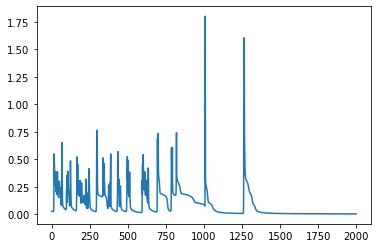

In [237]:
plt.plot(loss1)